# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [4]:
df = pd.read_csv("/Users/praveesha/Desktop/IS733/HW/HW3/faithful.csv")

# Problem 1
### A. Scatter plot - eruptions Vs waiting

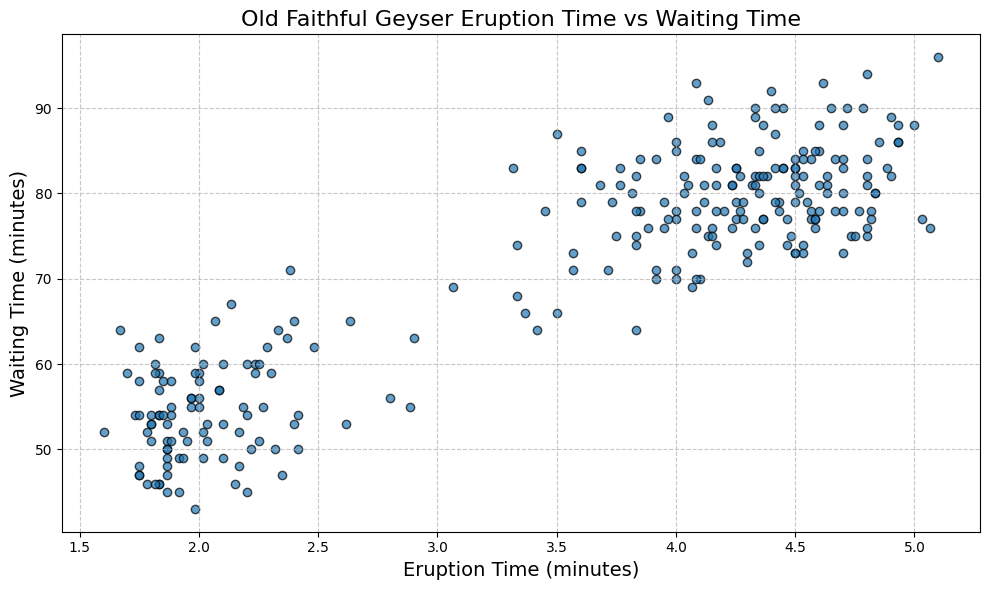

In [8]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7, edgecolors='k')

# Add labels and title
plt.title('Old Faithful Geyser Eruption Time vs Waiting Time', fontsize=16)
plt.xlabel('Eruption Time (minutes)', fontsize=14)
plt.ylabel('Waiting Time (minutes)', fontsize=14)

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### B. Number of Clusters

There are two clusters in the above scatter plot. One of the clusters, which is on the bottom left, ranges approximately between 1.5 to 2.5 eruption time on the X-axis and 10 to 70 waiting time on the Y-axis. The other cluster on the top right of the scatter plot ranges between 3.5 to 5.0 eruption time on the X-axis and 70 to 100 waiting time on the Y-axis.

### C. Steps of a heirarchical clustering algorithm

1. Creating a distance matrix by calculating distance between all the data points using a distance metric.
2. Each of the data points is assigned to a cluster.
3. Based on the distance metric, merge the clusters that are closest together.
4. Recalcutate the distances depending on the linkage criterion between the clusters that are formed newly and the remaining clusters.
5. Repeat the steps 3 and 4 until all the data points belong to a one single cluster.


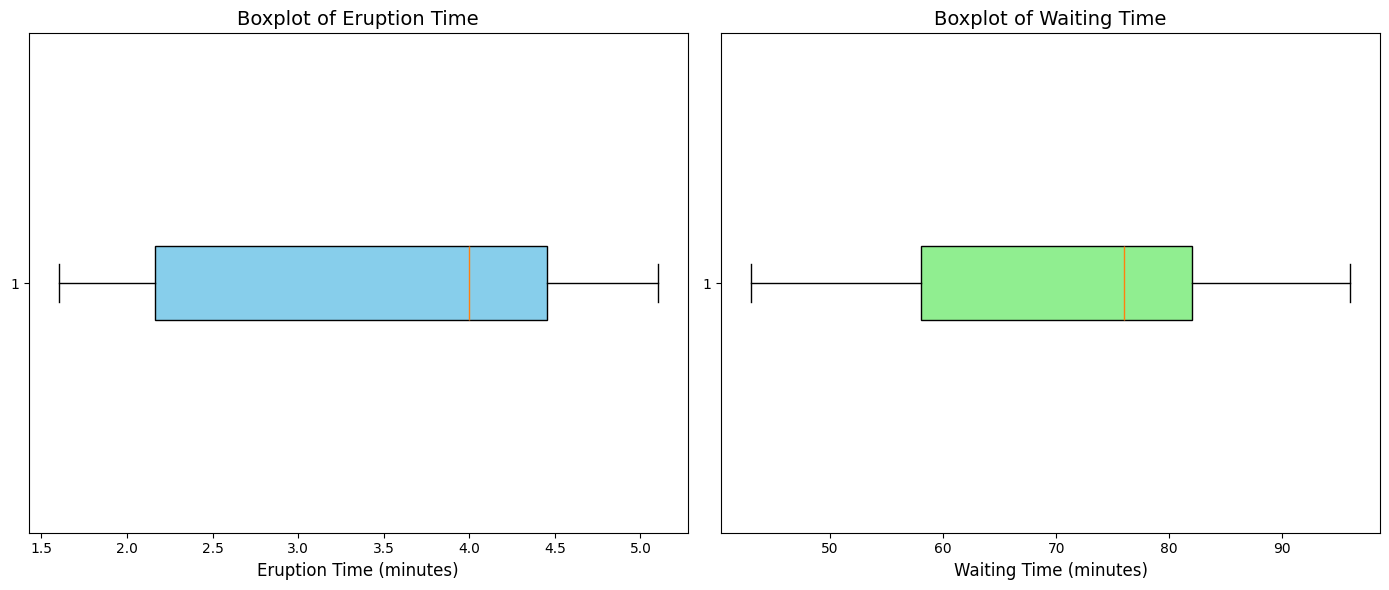

In [14]:
# Checking for outliers

# Extract the attributes 'eruptions' and 'waiting'
data = df[['eruptions', 'waiting']].values
# Create subplots for visualizing outliers in both attributes
plt.figure(figsize=(14, 6))

# Boxplot for 'eruptions'
plt.subplot(1, 2, 1)
plt.boxplot(df['eruptions'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Eruption Time', fontsize=14)
plt.xlabel('Eruption Time (minutes)', fontsize=12)

# Boxplot for 'waiting'
plt.subplot(1, 2, 2)
plt.boxplot(df['waiting'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Waiting Time', fontsize=14)
plt.xlabel('Waiting Time (minutes)', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Based on your scatter plot, would this method be appropriate for this dataset?

Based on the scatter plot, hierarchical method is appropriate for the following reasons -
1. There are no outliers in the dataset. The clustering will not be impacted by the outliers.
2. The two clusters formed are of different sizes, one is big, and the other is small, which hierarchical clustering can handle better compared to K-means.
3. The two clusters are irregular in shape, on which the hierarchical cluster works well.
4. The dataset is small, which makes the hierarchical clustering computationally feasible.

However, as the clusters are clearly separated, and there are no nested structures in the dataset based on the scatter plot, using K-means or DBSCAN would also work well. 

# Problem 2

### A. K-means algorithm

In [19]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# K-means clustering with objective function tracking
def kmeans_with_objective_tracking(data, k, max_iters=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]  # Initialize centroids
    objective_values = []  # To store objective function values

    for iteration in range(max_iters):
        # Assign clusters based on closest centroid
        clusters = []
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster = np.argmin(distances)  # Assign to the closest centroid
            clusters.append(cluster)
        
        clusters = np.array(clusters)
        
        # Calculate the objective function (sum of squared distances)
        ssd = 0
        for i in range(k):
            cluster_points = data[clusters == i]
            ssd += np.sum((cluster_points - centroids[i]) ** 2)
        objective_values.append(ssd)
        
        # Compute new centroids
        new_centroids = []
        for i in range(k):
            cluster_points = data[clusters == i]
            if len(cluster_points) > 0:
                new_centroids.append(np.mean(cluster_points, axis=0))
            else:
                # Handle empty clusters by reinitializing to a random point
                new_centroids.append(data[np.random.choice(data.shape[0])])
        
        new_centroids = np.array(new_centroids)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print(f"Converged after {iteration+1} iterations.")
            break
        centroids = new_centroids
    
    return clusters, centroids, objective_values

# Run K-means clustering with tracking
k = 2
clusters, centroids, objective_values = kmeans_with_objective_tracking(data, k)



Converged after 4 iterations.


### B. Scatter plot of the final clustering

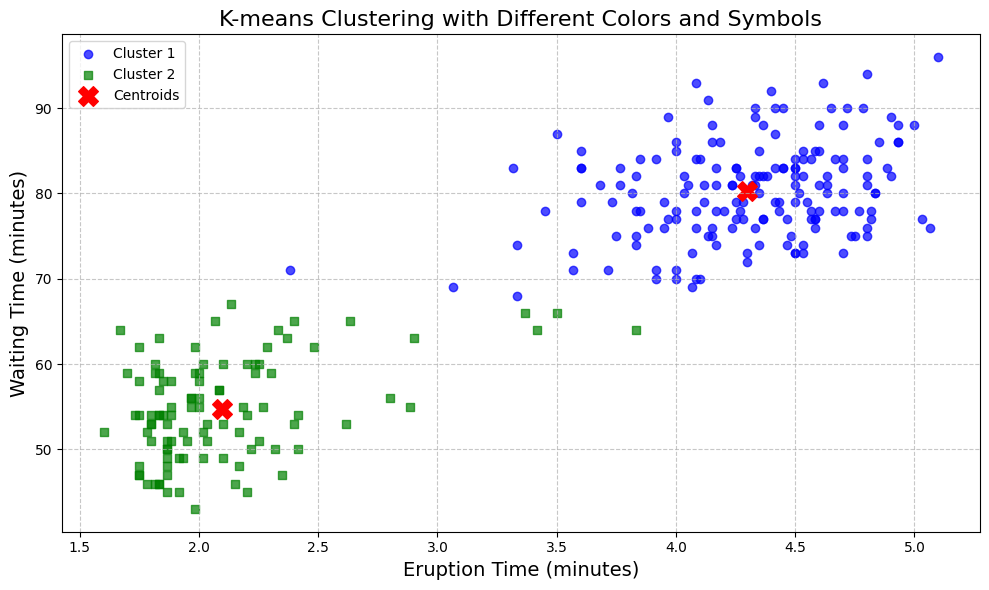

In [22]:
# Visualization with different colors and markers
plt.figure(figsize=(10, 6))

# Define colors and markers for clusters
colors = ['blue', 'green']
markers = ['o', 's']  # 'o' for circles, 's' for squares

# Plot data points with cluster assignments
for i in range(k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], marker=markers[i], label=f'Cluster {i+1}', alpha=0.7)

# Plot the centroids with a unique marker
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')

# Add labels, legend, and grid
plt.title('K-means Clustering with Different Colors and Symbols', fontsize=16)
plt.xlabel('Eruption Time (minutes)', fontsize=14)
plt.ylabel('Waiting Time (minutes)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### C. Plot of K-means objective function versus iterations of the algorithm

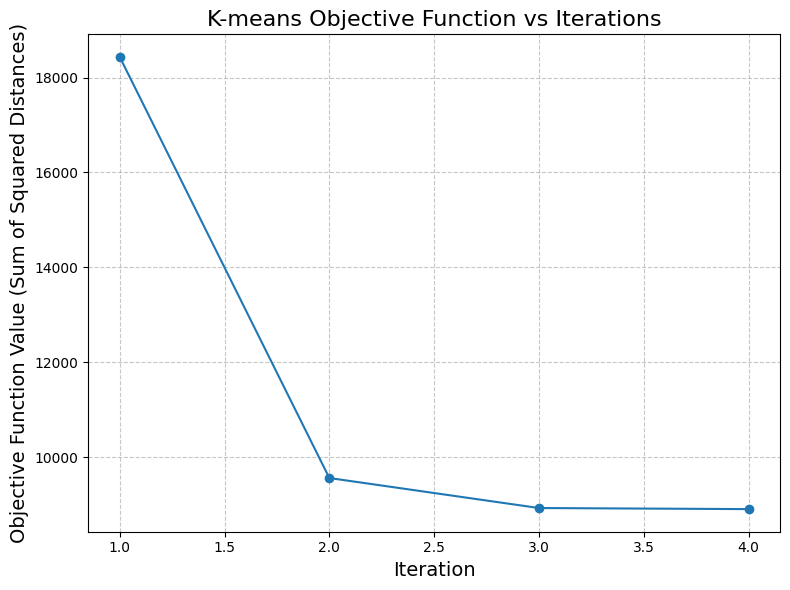

In [25]:
# Plot the objective function vs iterations
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, marker='o', linestyle='-')
plt.title('K-means Objective Function vs Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Objective Function Value (Sum of Squared Distances)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### C. Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? 

Yes, The method managed to find the clusters that are identified in Problem 1. The plot shows that the k-means algorithm successfully identified two clusters matching the ones in Problem 1, since the centroids are placed at the center of the clusters approximately of the initial scatter plot. This shows that the clusters formed align with those of in the Problem 1.